In [27]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv'
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any)
    return pd.read_csv(path, parse_dates=parse_dates)


In [3]:
df_orders      = read_olist_csv('../data/olist_orders_dataset.csv')
df_customers   = read_olist_csv('../data/olist_customers_dataset.csv')
df_items       = read_olist_csv('../data/olist_order_items_dataset.csv')
df_payments    = read_olist_csv('../data/olist_order_payments_dataset.csv')
df_reviews     = read_olist_csv('../data/olist_order_reviews_dataset.csv')
df_products    = read_olist_csv('../data/olist_products_dataset.csv')
df_prod_cat_tr = read_olist_csv('../data/product_category_name_translation.csv')
df_sellers     = read_olist_csv('../data/olist_sellers_dataset.csv')
df_geo         = read_olist_csv('../data/olist_geolocation_dataset.csv')

In [4]:
def initial_look_data(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
    print("\nMissing Values (Null):")
    display(df.isna().sum())
    print("\nDuplicate Data:")
    display(df.duplicated().sum())

# Initial Data Inspection

## Order

In [5]:
initial_look_data(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00



Missing Values (Null):


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Duplicate Data:


0

**Orders Table**

This table contains one row per order placed on the Olist marketplace, tracking the lifecycle of each order from purchase through delivery.

| Column                          | Data Type | Description                                                                                                                                                                                            |
|---------------------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id`                      | String    | Unique identifier for each order.                                                                                                                                                                      |
| `customer_id`                   | String    | Identifier linking to the customer who placed the order.                                                                                                                                               |
| `order_status`                  | String    | Current status of the order (e.g., `created`, `approved`, `shipped`, `delivered`, `canceled`).                                                                                                          |
| `order_purchase_timestamp`      | DateTime  | Date and time when the order was placed by the customer.                                                                                                                                              |
| `order_approved_at`             | DateTime  | Date and time when the payment for the order was approved. May be null if payment was never approved.                                                                                                  |
| `order_delivered_carrier_date`  | DateTime  | Date and time when the order was handed off to Olist’s logistics/carrier partner. May be null if not yet shipped.                                                                                      |
| `order_delivered_customer_date` | DateTime  | Date and time when the customer actually received the order. May be null if not yet delivered.                                                                                                         |
| `order_estimated_delivery_date` | DateTime  | The originally estimated delivery date communicated to the customer at the time of purchase.                                                                                                           |

- **Row represents:** One complete order (which may contain multiple items at the item level).  
- **Null values:** Reflect orders that did not reach a given stage (e.g., canceled before approval or still in transit).  
- **Usage:** These fields allow computation of key performance metrics such as payment lead time, shipping lead time, delivery lead time, and accuracy of estimated vs. actual delivery.  

## Order Item

In [6]:
initial_look_data(df_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405



Missing Values (Null):


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Duplicate Data:


0

| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `order_id`            | Unique identifier for the customer order. Multiple items can share an order ID. |
| `order_item_id`       | Sequential number of the item in the order (e.g., 1st item, 2nd item, etc.). |
| `product_id`          | Unique identifier for the specific product being purchased.                 |
| `seller_id`           | Unique identifier for the seller offering the product.                      |
| `shipping_limit_date` | Deadline by which the seller must ship the product to meet delivery SLA.    |
| `price`               | Price paid by the customer for the item (in BRL, excluding freight).         |
| `freight_value`       | Shipping cost for this item (in BRL).                |

## Seller

In [7]:
initial_look_data(df_sellers)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



Missing Values (Null):


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Duplicate Data:


0

**Sellers Table**

This table contains one row per seller registered on the Olist marketplace, capturing basic location information for each seller.

| Column                   | Data Type | Description                                           |
|--------------------------|-----------|-------------------------------------------------------|
| `seller_id`              | String    | Unique identifier for each seller.                    |
| `seller_zip_code_prefix` | Integer   | The first five digits (prefix) of the seller’s postal/ZIP code. |
| `seller_city`            | String    | Name of the city where the seller is located.         |
| `seller_state`           | String    | Two-letter state abbreviation where the seller is based. |

- **Row represents:** One individual seller.  
- **Usage:** These fields enable regional analyses—e.g., mapping seller density by city/state, joining with freight or demographic data, or calculating distance between sellers and customers.  


# Initial Data Exploration

## Sellers Basic Info

In [11]:
df_sellers.shape

(3095, 4)

In [10]:
df_sellers['seller_zip_code_prefix'].value_counts()

seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
         ..
83707     1
85065     1
78552     1
3632      1
12051     1
Name: count, Length: 2246, dtype: int64

2246 unique zip code prefix from 3095 sellers

<Axes: title={'center': 'Top 10 Seller Zip Code Prefixes'}, xlabel='seller_zip_code_prefix'>

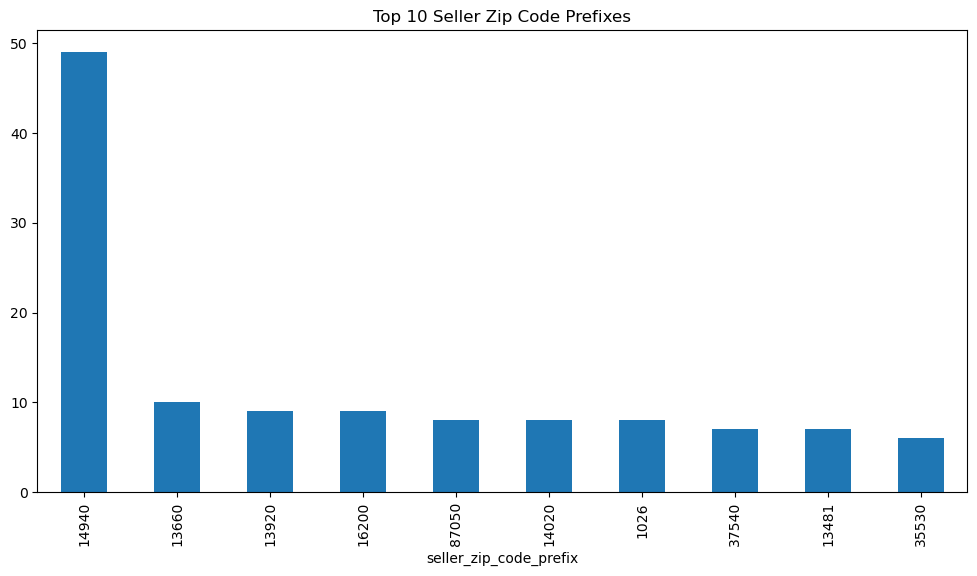

In [9]:
df_sellers['seller_zip_code_prefix'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Seller Zip Code Prefixes')

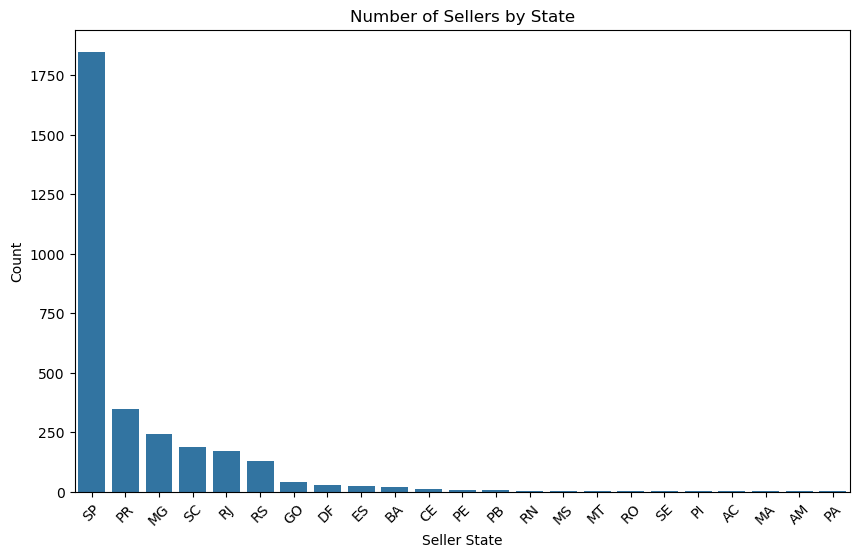

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sellers, x='seller_state', order=df_sellers['seller_state'].value_counts().index)
plt.title('Number of Sellers by State')
plt.xlabel('Seller State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
df_sellers['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

<Axes: title={'center': 'Top 10 Seller City'}, xlabel='seller_city'>

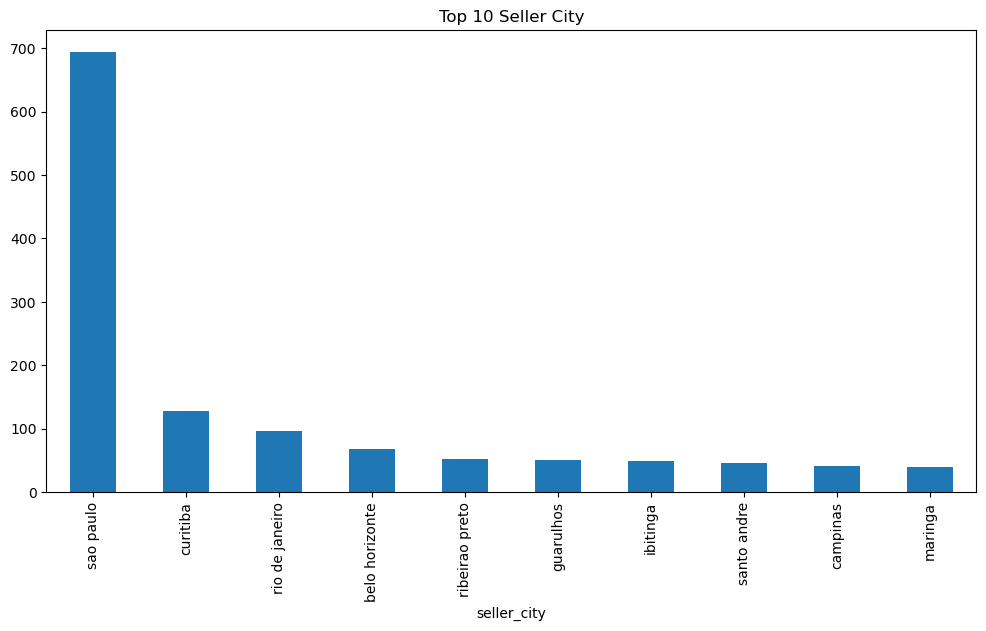

In [13]:
df_sellers['seller_city'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Seller City')

## Sellers KPI

### # of Orders & Item Sold per Seller

In [20]:
# Merge order_items with orders to get order status/dates
order_items_orders = pd.merge(df_items, df_orders, on='order_id', how='left')
order_items_orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [21]:
# Total number of items per seller
seller_kpi = df_items.groupby('seller_id').agg(
    total_items=('order_id', 'count'),
    unique_orders=('order_id', 'nunique')
).reset_index()

seller_kpi.head()

,seller_id,total_items,unique_orders
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,239,200
2,001e6ad469a905060d959994f1b41e4f,1,1
3,002100f778ceb8431b7a1020ff7ab48f,55,51
4,003554e2dce176b5555353e4f3555ac8,1,1


### Orders with Multiple Sellers

In [22]:
# Count how many unique sellers each order has
items_per_order = df_items.groupby('order_id')['seller_id'].nunique().reset_index(name='unique_seller_count')
items_per_order.head()

,order_id,unique_seller_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [23]:
# Get only orders with multiple sellers
multiple_sellers_orders = items_per_order[items_per_order['unique_seller_count'] > 1]
multiple_sellers_orders = multiple_sellers_orders.sort_values(by='unique_seller_count', ascending=False)
multiple_sellers_orders

,order_id,unique_seller_count
10831,1c11d0f4353b31ac3417fbfa5f0f2a8a,5
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
11231,1d23106803c48c391366ff224513fb7f,4
...,...,...
34353,5943920d752512f211b074b874e73526,2
34273,591083bc42b589c7052118aa83118e76,2
34216,58e03095584d960583933517a2aae5df,2
34177,58c4df4904044782bb1361c5cb001538,2


In [24]:
# Print an example of an order with multiple sellers
example_order_id = multiple_sellers_orders['order_id'].iloc[0]
example_order = order_items_orders[order_items_orders['order_id'] == example_order_id]
example_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
12378,1c11d0f4353b31ac3417fbfa5f0f2a8a,1,d64738c7b2e2d1778a51e835d8f02568,609e1a9a6c2539919b8205cf7c4e6ff0,2018-02-02 11:31:03,43.90,12.77,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12379,1c11d0f4353b31ac3417fbfa5f0f2a8a,2,a3a10562c9d134b92f04b8cce298d037,822166ed1e47908f7cfb49946d03c726,2018-02-02 11:31:03,22.49,25.54,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12380,1c11d0f4353b31ac3417fbfa5f0f2a8a,3,d80fce9f775927c7d602c2de926759f1,747c1cdcd1737dcfbd1547f6eb6f2cf3,2018-02-02 11:31:03,88.00,12.77,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12381,1c11d0f4353b31ac3417fbfa5f0f2a8a,4,ddbf57e4559f03c003fc3708d4860c5e,1835b56ce799e6a4dc4eddc053f04066,2018-02-02 11:31:03,29.99,12.77,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12382,1c11d0f4353b31ac3417fbfa5f0f2a8a,5,a3a10562c9d134b92f04b8cce298d037,822166ed1e47908f7cfb49946d03c726,2018-02-02 11:31:03,22.49,25.54,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12383,1c11d0f4353b31ac3417fbfa5f0f2a8a,6,d3a386ad58b99f0ddcc216ed9efb03c3,609e1a9a6c2539919b8205cf7c4e6ff0,2018-02-02 11:31:03,43.90,12.77,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05
12384,1c11d0f4353b31ac3417fbfa5f0f2a8a,7,61b6e5d2e3ee58d2b341b8ef1a652b26,c7fdb77fdbff3c41981bc52f787e959e,2018-02-02 11:31:03,56.00,12.77,50920f8cd0681fd86ebe93670c8fe52e,delivered,2018-01-27 11:28:32,2018-01-29 11:35:23,2018-01-29 21:52:41,2018-02-16 16:26:53,2018-03-05


In [25]:
# Print an example of an order with multiple sellers
example_order_id = multiple_sellers_orders['order_id'].iloc[10]
example_order = order_items_orders[order_items_orders['order_id'] == example_order_id]
example_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
102525,e8c92cfd87f5f0c6d2fc5bc1df5f02b4,1,ec56aff88e030dcb3b2be22c96ace90a,609e1a9a6c2539919b8205cf7c4e6ff0,2018-06-12 19:30:05,19.90,15.41,3d338ae6cd95dcb8c0c14d9af90055f3,delivered,2018-06-04 19:07:48,2018-06-04 19:30:05,2018-06-05 14:34:00,2018-06-11 17:37:49,2018-07-16
102526,e8c92cfd87f5f0c6d2fc5bc1df5f02b4,2,9fab8bd1f9c69cf2301b8ad3bec47480,dfa0c4c6229ab200a4a1336b4d7128ff,2018-06-08 19:30:05,39.00,15.40,3d338ae6cd95dcb8c0c14d9af90055f3,delivered,2018-06-04 19:07:48,2018-06-04 19:30:05,2018-06-05 14:34:00,2018-06-11 17:37:49,2018-07-16
102527,e8c92cfd87f5f0c6d2fc5bc1df5f02b4,3,08056d78bb75ed3ace107c72c16ec511,3d4824f20035949c710eaf111f869d39,2018-06-12 19:30:05,117.27,17.82,3d338ae6cd95dcb8c0c14d9af90055f3,delivered,2018-06-04 19:07:48,2018-06-04 19:30:05,2018-06-05 14:34:00,2018-06-11 17:37:49,2018-07-16


In [26]:
# Print an example of an order with multiple sellers
example_order_id = multiple_sellers_orders['order_id'].iloc[3]
example_order = order_items_orders[order_items_orders['order_id'] == example_order_id]
example_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
63809,91be51c856a90d7efe86cf9d082d6ae3,1,73bcea4312cb31d72bffc6562f7f7c71,da7039f29f90ce5b4846ffc0fcc93beb,2018-06-14 16:30:57,122.90,19.17,637321037fb8b34323ce7fd8aab4a0f1,delivered,2018-06-12 15:58:03,2018-06-12 16:32:26,2018-06-12 15:44:00,2018-06-15 15:42:07,2018-07-12
63810,91be51c856a90d7efe86cf9d082d6ae3,2,96627b65a0070635b620d07f97e63347,fcb5ace8bcc92f75707dc0f01a27d269,2018-06-19 16:30:57,76.65,19.17,637321037fb8b34323ce7fd8aab4a0f1,delivered,2018-06-12 15:58:03,2018-06-12 16:32:26,2018-06-12 15:44:00,2018-06-15 15:42:07,2018-07-12
63811,91be51c856a90d7efe86cf9d082d6ae3,3,b7351032045cba592a6d97b36f5fd8e3,ce69a8021d18961dd2a40269b7c2c293,2018-06-18 16:30:57,99.99,19.16,637321037fb8b34323ce7fd8aab4a0f1,delivered,2018-06-12 15:58:03,2018-06-12 16:32:26,2018-06-12 15:44:00,2018-06-15 15:42:07,2018-07-12
63812,91be51c856a90d7efe86cf9d082d6ae3,4,ae3e0cf8b9e4a3a027fc5d4b0a3eb2a0,596849622429351f47b32e6cae1055ff,2018-06-18 16:30:57,39.90,0.96,637321037fb8b34323ce7fd8aab4a0f1,delivered,2018-06-12 15:58:03,2018-06-12 16:32:26,2018-06-12 15:44:00,2018-06-15 15:42:07,2018-07-12


So, it seems like Olist manages everything even up to shipping. The sellers will be given different shipping limit date so the customer will receive the exact same delivery time even if the items belong to different sellers from different locations. This makes me wonder if the additional platform (e.g. Shopee, Amazon) have any effect at all.

Potential discrepancy in data: order_delivered_carrier_date is earlier than purchase & approval timestamp, which is impossible.

#### **Why do the delivery deadlines and other dates look almost the same for all items in one order, even with different sellers?**

**1. How Olist Handles Shipping and Deadlines**

* **Olist is a marketplace aggregator:**
  Olist itself acts as the front-facing platform, and manages the entire order workflow, including logistics.

  * **Customers** place *one* order (even if buying from many sellers).
  * **Sellers** ship to the customer, but **Olist controls the order deadlines, shipping instructions, and (often) the logistics providers**.

* **Unified Shipping Deadlines:**
  For a better customer experience, Olist (like most large marketplaces) gives a **single promised delivery window** for the entire order—even if the products are coming from different sellers.

  * The `order_estimated_delivery_date`, `order_delivered_customer_date`, etc., are shown as the same for all items in one order, so that **the customer always knows one deadline**.
  * The **shipping\_limit\_date** (per item) is Olist’s internal deadline for the seller to hand over the package to the shipping provider (or Olist’s logistics partner). This can vary slightly between items (because of product, seller location, or fulfillment type), but often Olist makes them similar to coordinate all items.

* **If locations are far apart:**
  Olist sets the deadline based on the **seller with the longest required delivery time**. This way, all items should ideally arrive by the same date for the customer.

  * In practice, some items might arrive earlier or later, but Olist aims to manage customer expectations by giving a single estimate.

**2. Real-World Analogy**

* Imagine ordering a phone and a t-shirt on Tokopedia or Shopee from two different shops, but choosing “Ongkir Reguler” (standard shipping) for the whole cart.
* The platform promises: “Your order will arrive between July 7-10.”
* Each seller gets a **shipping deadline**: “Ship out by July 3.”
* The **platform calculates these deadlines for each item**, but tries to synchronize them so you get everything together (or close).

**3. What if a seller ships late or is far away?**

* Olist will penalize or warn sellers who don’t ship by their **shipping\_limit\_date** (this is why that date exists for each item).
* If a seller’s location is far, the `shipping_limit_date` is set earlier, to ensure all items arrive by the customer’s promised delivery date.

**4. Why does `order_delivered_carrier_date` always look the same for all items?**

* That field is **copied from the orders table** when you do a merge, so all items inherit the same value.
* It refers to when the carrier received the *last* item of the order, or when Olist considers the order as “shipped.”

**5. Why are some `shipping_limit_date` values slightly different?**

* Sometimes, Olist allows a little variation based on product, seller rating, or warehouse location. For example, in Output 2, one item's limit is 4 days earlier—maybe that seller is known to be slower, or the product is a “preorder.”

---

**What does this mean for your analysis?**

* **For most customers, they experience “one shipping and delivery promise”** per order, no matter how many sellers are involved.
* **For operational or seller performance analytics,** you MUST use `shipping_limit_date` and track it *per item/seller*. That’s the true measure of each seller’s performance.
* **If you want to analyze lateness or SLA violations,** compare `shipping_limit_date` (per item) with the actual handover/delivery dates (if available in your data).

---

**Business Best Practices (what you can learn and mention in your project):**

* Marketplaces unify delivery promises for customer convenience.
* Internally, each seller is tracked with item-level deadlines, so the platform can enforce standards.
* Coordinating shipping across multiple sellers is logistically complex and a key competitive differentiator.

---

**Summary Table**

| Field                           | Level      | Who sees/uses it?  | Meaning                                          |
| ------------------------------- | ---------- | ------------------ | ------------------------------------------------ |
| `order_estimated_delivery_date` | Order      | Customer, Platform | When the whole order *should* arrive             |
| `order_delivered_customer_date` | Order      | Customer, Platform | When the whole order *did* arrive                |
| `shipping_limit_date`           | Order Item | Platform, Seller   | Seller’s deadline to ship out that specific item |

---

**If you want to check seller location effects:**

* You can join `order_items` with the `sellers` and `geolocation` tables and **visualize delivery times by seller state/city**.
* If you see many orders with very different seller locations but the same delivery date, that's Olist’s orchestration in action!

### Seller Delivery Performance (Time)

In [29]:
order_items_orders['actual_delivery_days'] = (order_items_orders['order_delivered_customer_date'] - order_items_orders['order_purchase_timestamp']).dt.days
order_items_orders['promised_delivery_days'] = (order_items_orders['order_estimated_delivery_date'] - order_items_orders['order_purchase_timestamp']).dt.days
order_items_orders['delivery_speed_vs_promise'] = order_items_orders['actual_delivery_days'] - order_items_orders['promised_delivery_days']
order_items_orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_days,promised_delivery_days,delivery_speed_vs_promise
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.0,15,-8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,18,-2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.0,21,-14.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,11,-5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,40,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,17.0,24,-7.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,9.0,17,-8.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,4.0,17,-13.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1.0,10,-9.0


In [30]:
seller_delivery_speed = order_items_orders.groupby('seller_id').agg(
    avg_actual_delivery_days=('actual_delivery_days', 'mean'),
    avg_promised_delivery_days=('promised_delivery_days', 'mean'),
    avg_delivery_speed_vs_promise=('delivery_speed_vs_promise', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index()

In [31]:
seller_delivery_speed.isna().sum()

seller_id                          0
avg_actual_delivery_days         125
avg_promised_delivery_days         0
avg_delivery_speed_vs_promise    125
total_orders                       0
dtype: int64

In [32]:
seller_delivery_speed[seller_delivery_speed['total_orders'] == 0]

,seller_id,avg_actual_delivery_days,avg_promised_delivery_days,avg_delivery_speed_vs_promise,total_orders


Every seller has at least 1 order

In [33]:
valid_sellers = seller_delivery_speed[seller_delivery_speed['avg_actual_delivery_days'].notna()]
no_delivery_sellers = seller_delivery_speed[seller_delivery_speed['avg_actual_delivery_days'].isna()]

print(f"Number of valid sellers: {len(valid_sellers)}")
print(f"Number of sellers with no delivery data: {len(no_delivery_sellers)}")

Number of valid sellers: 2970
Number of sellers with no delivery data: 125


In [34]:
valid_sellers.describe()

,avg_actual_delivery_days,avg_promised_delivery_days,avg_delivery_speed_vs_promise,total_orders
count,2970.000000,2970.000000,2970.000000,2970.000000
mean,11.705458,23.339885,-11.687104,33.617508
std,7.111951,7.215572,8.018248,107.133714
min,1.000000,2.000000,-65.000000,1.000000
25%,7.944504,19.333333,-14.919246,2.000000
50%,10.691851,23.000000,-11.405828,7.000000
75%,13.828125,26.664948,-8.500000,23.000000
max,189.000000,79.000000,167.000000,1854.000000


In [35]:
valid_sellers.sort_values(by='avg_delivery_speed_vs_promise', ascending=True)

,seller_id,avg_actual_delivery_days,avg_promised_delivery_days,avg_delivery_speed_vs_promise,total_orders
1800,933446e9a59dece7ae9175103820ca8f,24.000000,51.000000,-65.000000,2
138,0b09101900100c0e9d312861fad5a1b9,18.000000,79.000000,-61.000000,1
3027,fa5fdc4e4bb6bd1009ad0e4ac4096562,7.000000,64.000000,-57.000000,1
807,432c67955c0acd1fd6b0b5d678766a71,6.000000,48.000000,-48.000000,3
3094,ffff564a4f9085cd26170f4732393726,11.875000,43.000000,-47.875000,20
...,...,...,...,...,...
2884,eebb3372362aa9a46975164bed19a7e7,52.250000,24.125000,27.750000,7
958,4fb41dff7c50136976d1a5cf004a42e2,66.333333,32.666667,33.666667,3
1645,8629a7efec1aab257e58cda559f03ba7,59.000000,25.000000,34.000000,1
1745,8e670472e453ba34a379331513d6aab1,86.000000,50.000000,36.000000,1


In [36]:
valid_sellers.sort_values(by='avg_delivery_speed_vs_promise', ascending=False)

,seller_id,avg_actual_delivery_days,avg_promised_delivery_days,avg_delivery_speed_vs_promise,total_orders
2699,df683dfda87bf71ac3fc63063fba369d,189.000000,22.000000,167.000000,1
1745,8e670472e453ba34a379331513d6aab1,86.000000,50.000000,36.000000,1
1645,8629a7efec1aab257e58cda559f03ba7,59.000000,25.000000,34.000000,1
958,4fb41dff7c50136976d1a5cf004a42e2,66.333333,32.666667,33.666667,3
2884,eebb3372362aa9a46975164bed19a7e7,52.250000,24.125000,27.750000,7
...,...,...,...,...,...
3094,ffff564a4f9085cd26170f4732393726,11.875000,43.000000,-47.875000,20
807,432c67955c0acd1fd6b0b5d678766a71,6.000000,48.000000,-48.000000,3
3027,fa5fdc4e4bb6bd1009ad0e4ac4096562,7.000000,64.000000,-57.000000,1
138,0b09101900100c0e9d312861fad5a1b9,18.000000,79.000000,-61.000000,1


In [37]:
valid_sellers.sort_values(by='total_orders', ascending=False)

,seller_id,avg_actual_delivery_days,avg_promised_delivery_days,avg_delivery_speed_vs_promise,total_orders
1235,6560211a19b47992c3666cc44a7e94c0,9.058617,20.176586,-11.123747,1854
881,4a3ca9315b744ce9f8e9374361493884,13.939456,23.059386,-9.074910,1806
2481,cc419e0650a3c5ba77189a1882b7556a,11.063409,23.532394,-12.474113,1706
368,1f50f920176fa81dab994f9023523100,15.106957,25.342828,-10.226376,1404
2643,da8622b14eb17ae2831f4ac5b9dab84a,10.698320,21.366215,-10.653101,1314
...,...,...,...,...,...
495,2a50b7ee5aebecc6fd0ff9784a4747d6,39.000000,22.000000,17.000000,1
2638,da2782c804606d2a5d8e1760dbb3e7ec,32.000000,18.000000,14.000000,1
2639,da3fede3469bf49b7293ce3fc45b294d,11.000000,18.000000,-7.000000,1
1764,8fd3b4468f6425810648177996c14cbd,9.000000,28.000000,-19.000000,1


In [38]:
early_sellers = valid_sellers[valid_sellers['avg_delivery_speed_vs_promise'] < 0]
on_time_exact_sellers = valid_sellers[valid_sellers['avg_delivery_speed_vs_promise'] == 0]
late_sellers = valid_sellers[valid_sellers['avg_delivery_speed_vs_promise'] > 0]

print(f"Early sellers: {len(early_sellers)} ({len(early_sellers) / len(valid_sellers) * 100:.1f}%)")
print(f"Exactly on time sellers: {len(on_time_exact_sellers)} ({len(on_time_exact_sellers) / len(valid_sellers) * 100:.1f}%)")
print(f"Late sellers: {len(late_sellers)} ({len(late_sellers) / len(valid_sellers) * 100:.1f}%)")

Early sellers: 2861 (96.3%)
Exactly on time sellers: 10 (0.3%)
Late sellers: 99 (3.3%)


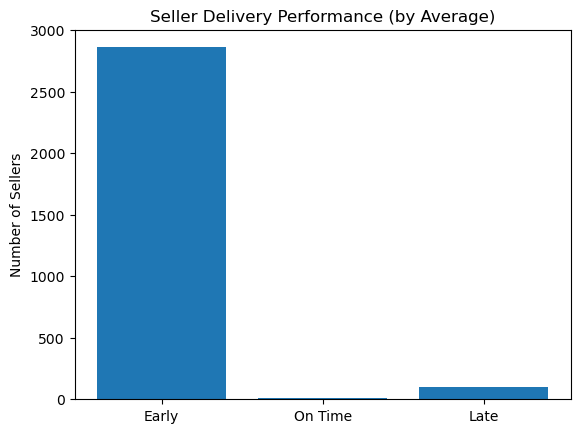

In [39]:
counts = [
    len(early_sellers),
    len(on_time_exact_sellers),
    len(late_sellers)
]
labels = ['Early', 'On Time', 'Late']

plt.bar(labels, counts)
plt.title('Seller Delivery Performance (by Average)')
plt.ylabel('Number of Sellers')
plt.show()


In [40]:
def order_status_bucket(days):
    if days < 0:
        return 'early'
    elif days == 0:
        return 'on_time'
    else:
        return 'late'

# Add a status column to each order
order_items_orders['delivery_speed_status'] = order_items_orders['delivery_speed_vs_promise'].apply(order_status_bucket)
order_items_orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_days,promised_delivery_days,delivery_speed_vs_promise,delivery_speed_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.0,15,-8.0,early
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,18,-2.0,early
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.0,21,-14.0,early
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,11,-5.0,early
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,40,-15.0,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,17.0,24,-7.0,early
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,9.0,17,-8.0,early
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,4.0,17,-13.0,early
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1.0,10,-9.0,early


In [41]:
# Calculate frequency and average per seller
seller_punctuality = (
    order_items_orders
    .groupby('seller_id')
    .agg(
        total_orders=('order_id', 'count'),
        avg_delivery_speed_vs_promise=('delivery_speed_vs_promise', 'mean'),
        late_orders=('delivery_speed_status', lambda x: (x == 'late').sum()),
        on_time_orders=('delivery_speed_status', lambda x: (x == 'on_time').sum()),
        early_orders=('delivery_speed_status', lambda x: (x == 'early').sum()),
    )
    .reset_index()
)

# Calculate rates
seller_punctuality['pct_late'] = seller_punctuality['late_orders'] / seller_punctuality['total_orders'] * 100
seller_punctuality['pct_on_time'] = seller_punctuality['on_time_orders'] / seller_punctuality['total_orders'] * 100
seller_punctuality['pct_early'] = seller_punctuality['early_orders'] / seller_punctuality['total_orders'] * 100

In [42]:
seller_punctuality

,seller_id,total_orders,avg_delivery_speed_vs_promise,late_orders,on_time_orders,early_orders,pct_late,pct_on_time,pct_early
0,0015a82c2db000af6aaaf3ae2ecb0532,3,-15.666667,0,0,3,0.000000,0.00000,100.000000
1,001cca7ae9ae17fb1caed9dfb1094831,239,-12.696581,17,2,220,7.112971,0.83682,92.050209
2,001e6ad469a905060d959994f1b41e4f,1,NaN,1,0,0,100.000000,0.00000,0.000000
3,002100f778ceb8431b7a1020ff7ab48f,55,-7.407407,10,0,45,18.181818,0.00000,81.818182
4,003554e2dce176b5555353e4f3555ac8,1,-26.000000,0,0,1,0.000000,0.00000,100.000000
...,...,...,...,...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1,NaN,1,0,0,100.000000,0.00000,0.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,-11.650000,0,0,20,0.000000,0.00000,100.000000
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,-7.714286,2,0,12,14.285714,0.00000,85.714286
3093,fffd5413c0700ac820c7069d66d98c89,61,-10.672414,11,0,50,18.032787,0.00000,81.967213


In [43]:
valid_sellers_punctuality = seller_punctuality[seller_punctuality['avg_delivery_speed_vs_promise'].notna()]
valid_sellers_punctuality

,seller_id,total_orders,avg_delivery_speed_vs_promise,late_orders,on_time_orders,early_orders,pct_late,pct_on_time,pct_early
0,0015a82c2db000af6aaaf3ae2ecb0532,3,-15.666667,0,0,3,0.000000,0.000000,100.000000
1,001cca7ae9ae17fb1caed9dfb1094831,239,-12.696581,17,2,220,7.112971,0.836820,92.050209
3,002100f778ceb8431b7a1020ff7ab48f,55,-7.407407,10,0,45,18.181818,0.000000,81.818182
4,003554e2dce176b5555353e4f3555ac8,1,-26.000000,0,0,1,0.000000,0.000000,100.000000
5,004c9cd9d87a3c30c522c48c4fc07416,170,-11.440476,12,7,151,7.058824,4.117647,88.823529
...,...,...,...,...,...,...,...,...,...
3089,ffc470761de7d0232558ba5e786e57b7,31,-11.066667,3,2,26,9.677419,6.451613,83.870968
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,-11.650000,0,0,20,0.000000,0.000000,100.000000
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,-7.714286,2,0,12,14.285714,0.000000,85.714286
3093,fffd5413c0700ac820c7069d66d98c89,61,-10.672414,11,0,50,18.032787,0.000000,81.967213


In [44]:
valid_sellers_punctuality.sort_values(by='pct_late', ascending=False)

,seller_id,total_orders,avg_delivery_speed_vs_promise,late_orders,on_time_orders,early_orders,pct_late,pct_on_time,pct_early
2879,edf3fabebcc20f7463cc9c53da932ea8,1,5.000000,1,0,0,100.0,0.0,0.0
1531,7c462184585ae80bd6e5774c62ce50f2,2,9.000000,2,0,0,100.0,0.0,0.0
2894,efb628aa07c8ca93d7db0d85b91a4f5a,1,2.000000,1,0,0,100.0,0.0,0.0
2314,c004e5ea15737026cecaee0447e00b75,2,16.000000,2,0,0,100.0,0.0,0.0
245,154bdf805377afea75a3bd158e9eab10,1,2.000000,1,0,0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
460,26e2e5033827d2ba53929f43e03d8ffe,1,-13.000000,0,0,1,0.0,0.0,100.0
1704,8b181ee5518df84f18f4e1a43fe07923,1,-21.000000,0,0,1,0.0,0.0,100.0
1703,8b11118053756a9a2932f447e11fc1b5,1,-41.000000,0,0,1,0.0,0.0,100.0
1701,8ab42aa58097fd4668d60cc648225d5f,26,-16.807692,0,0,26,0.0,0.0,100.0


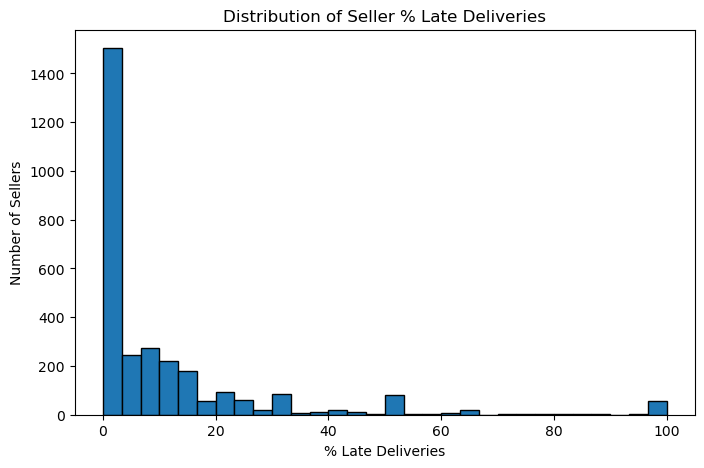

In [45]:
plt.figure(figsize=(8,5))
plt.hist(valid_sellers_punctuality['pct_late'], bins=30, edgecolor='black')
plt.title('Distribution of Seller % Late Deliveries')
plt.xlabel('% Late Deliveries')
plt.ylabel('Number of Sellers')
plt.show()

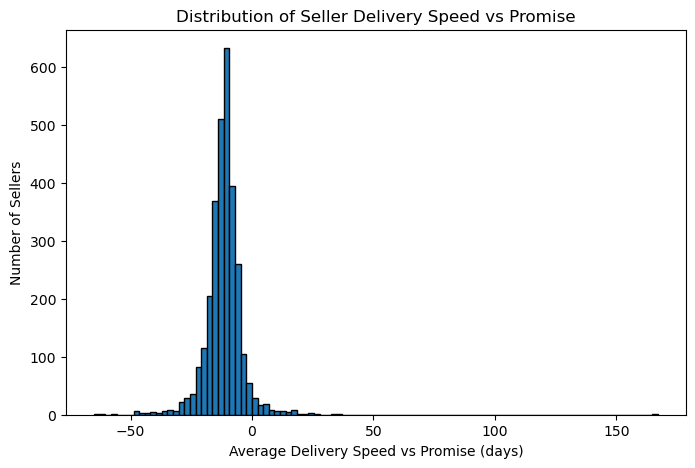

In [46]:
plt.figure(figsize=(8,5))
plt.hist(valid_sellers_punctuality['avg_delivery_speed_vs_promise'], bins=100, edgecolor='black')
plt.title('Distribution of Seller Delivery Speed vs Promise')
plt.xlabel('Average Delivery Speed vs Promise (days)')
plt.ylabel('Number of Sellers')
plt.show()

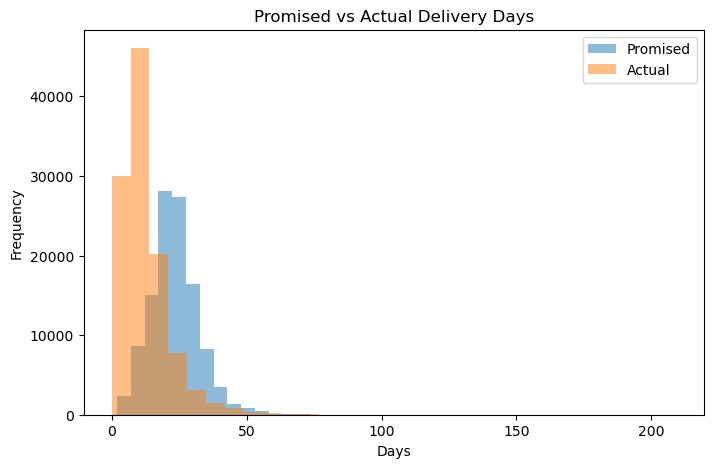

In [47]:
plt.figure(figsize=(8,5))
plt.hist(order_items_orders['promised_delivery_days'], bins=30, alpha=0.5, label='Promised')
plt.hist(order_items_orders['actual_delivery_days'], bins=30, alpha=0.5, label='Actual')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Promised vs Actual Delivery Days')
plt.show()

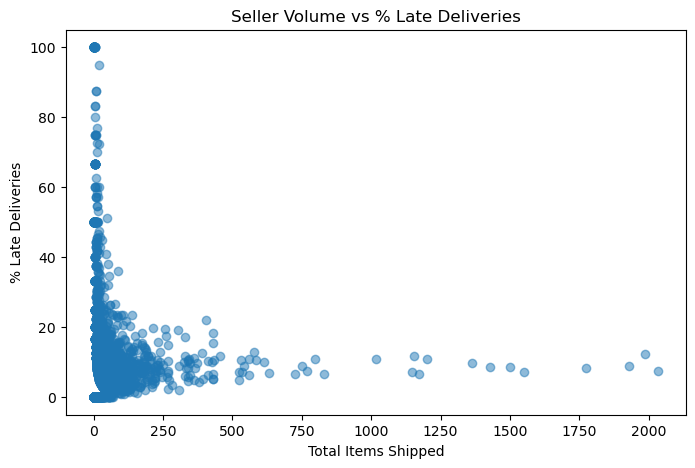

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(valid_sellers_punctuality['total_orders'], valid_sellers_punctuality['pct_late'], alpha=0.5)
plt.xlabel('Total Items Shipped')
plt.ylabel('% Late Deliveries')
plt.title('Seller Volume vs % Late Deliveries')
plt.show()

In [49]:
# E.g., >20% late as "risky", <5% as "excellent"
risky_sellers = valid_sellers_punctuality[valid_sellers_punctuality['pct_late'] > 20]
excellent_sellers = valid_sellers_punctuality[valid_sellers_punctuality['pct_late'] < 5]
print(f"Risky sellers (>20% late): {len(risky_sellers)}")
print(f"Excellent sellers (<5% late): {len(excellent_sellers)}")

Risky sellers (>20% late): 440
Excellent sellers (<5% late): 1625


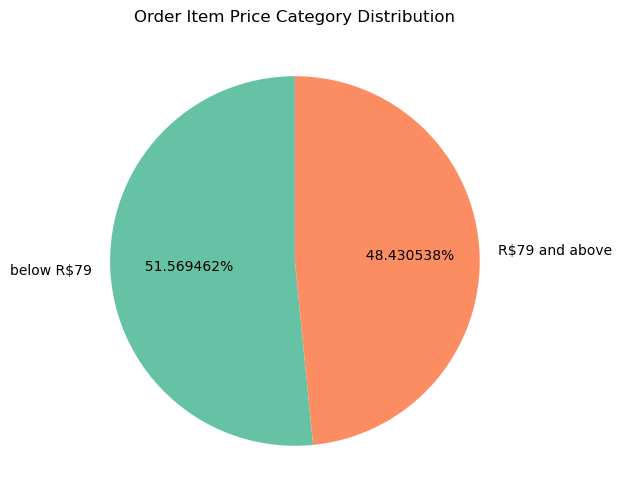

In [50]:
# Plot a pie chart between order item below R$79 and order item >= R$79
order_items_orders['price_category'] = order_items_orders['price'].apply(lambda x: 'below R$79' if x < 79 else 'R$79 and above')
plt.figure(figsize=(8, 6))
order_items_orders['price_category'].value_counts().plot(kind='pie', autopct='%11f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Order Item Price Category Distribution')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()